# Analysis of SleepCycle data

Let's start by downloading the data from SleepSecure(TM):

In [1]:
from quelf.sleepcycle import SleepCycle

sc = SleepCycle()
data = sc.data

How large is our dataset?

In [2]:
len(data)

821

What does our data consist of?

In [3]:
data.columns

Index(['events', 'start', 'stop'], dtype='object')

What does our latest data point look like?

In [4]:
data.loc[0]

events    [[60.0, 3, 0.0030999999999990003], [60.0, 1, 0...
start                                   2018-03-29 23:22:12
stop                                    2018-03-30 10:33:12
Name: 0, dtype: object

## Data processing
Let's calculate how long each sleep recording lasts:

In [5]:
time_slept = data['stop'] - data['start']
data['time_slept'] = time_slept
time_slept.describe()

count                       821
mean     0 days 08:49:13.627283
std      0 days 01:26:58.706599
min             0 days 01:09:58
25%             0 days 08:06:51
50%             0 days 08:36:23
75%             0 days 09:25:53
max             0 days 22:31:51
dtype: object

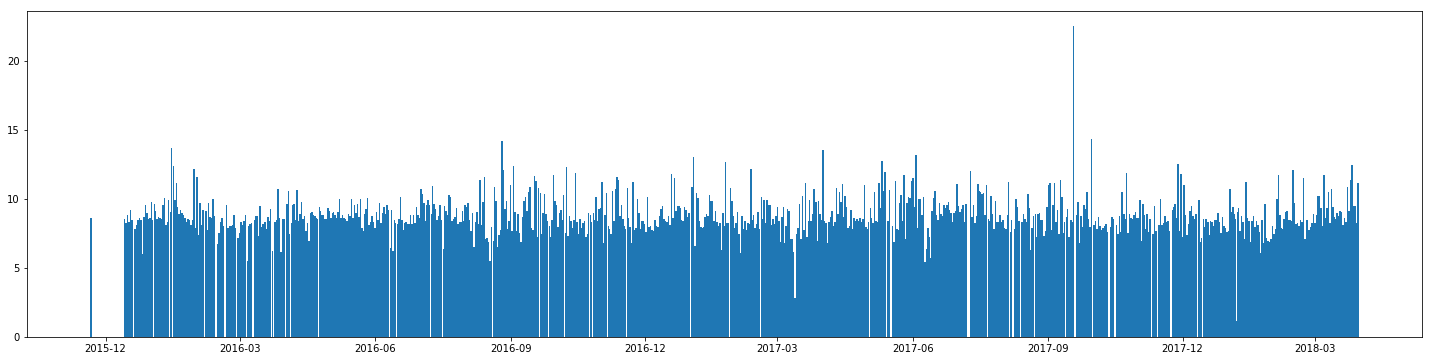

In [7]:
from datetime import timedelta
import matplotlib.pyplot as plt

# Fill the width of a 1920x1080 screen when plotting the entire dataset
plt.rcParams['figure.figsize'] = [25, 6]

hours_slept = time_slept.dt.total_seconds() / (60 * 60)
plt.bar(data['start'].values, hours_slept, width=1)

plt.show()